## Pandas - load data, create mask, and sorting

<img src="data/city.jpg" width=300/>
<br>

Let's load `data/cities.csv`! It is worth to take a peek into the file in a text editor before loading it! This file contains the coordinates of all the cities with more citizens than 15.000.

Try to find all of the cities in Europe, that have more citizens than 2.000.000! Then print the sorted ascending by population size!

Let the following rectangle define the coordinates for Europe:
* (longitude, latitude): (-20.2, 34.5) and (42.7, 72.4)

### Solution

In [2]:
import pandas as pd

In [3]:
datafile="data/cities.csv"

In [4]:
# Check the first few lines with the head bash command
!head $datafile

id#name#lon#lat#country#population
3040051#les Escaldes#1.53414#42.507290000000005#AD#15853
3041563#Andorra la Vella#1.52109#42.50779#AD#20430
290594#Umm al Qaywayn#55.55517#25.564729999999997#AE#44411
291074#Ras al-Khaimah#55.9432#25.78953#AE#115949
291696#Khawr Fakkan#56.34199#25.33132#AE#33575
292223#Dubai#55.17128#25.0657#AE#1137347
292231#Dibba Al-Fujairah#56.261759999999995#25.59246#AE#30000
292239#Dibba Al-Hisn#56.272909999999996#25.61955#AE#26395
292672#Sharjah#55.41206#25.33737#AE#543733


In [5]:
# Skip all lines, which comments
df = pd.read_csv(datafile, sep="#")
df.head()

,id,name,lon,lat,country,population
0,3040051,les Escaldes,1.53414,42.50729,AD,15853
1,3041563,Andorra la Vella,1.52109,42.50779,AD,20430
2,290594,Umm al Qaywayn,55.55517,25.56473,AE,44411
3,291074,Ras al-Khaimah,55.94320,25.78953,AE,115949
4,291696,Khawr Fakkan,56.34199,25.33132,AE,33575


In [6]:
# First condition for the population size
mask_1 = df["population"] > 2000000
df[mask_1]

,id,name,lon,lat,country,population
41,1138958,Kabul,69.17233,34.52813,AF,3043532
112,2240449,Luanda,13.23432,-8.83682,AO,2776168
189,3435910,Buenos Aires,-58.37723,-34.61315,AR,13076300
407,2147714,Sydney,151.20732,-33.86785,AU,4627345
448,2158177,Melbourne,144.96332,-37.81400,AU,4246375
...,...,...,...,...,...,...
22737,3646738,Caracas,-66.87919,10.48801,VE,3000000
22774,1566083,Ho Chi Minh City,106.62965,10.82302,VN,3467331
22990,993800,Johannesburg,28.04363,-26.20227,ZA,2026469
23009,1007311,Durban,31.02920,-29.85790,ZA,3120282


In [7]:
# Second condition for geographical location
mask_2 = (df["lon"]>-20.2) & (df["lon"]<42.7) & (df["lat"]>34.5) & (df["lat"]<72.4)

# And combine the two
df[mask_1 * mask_2].sort_values(by="population",ascending=False)

,id,name,lon,lat,country,population
19119,745044,Istanbul,28.94966,41.01384,TR,11174257
17261,524901,Moscow,37.61556,55.75222,RU,10381222
7539,2643741,City of London,-0.09184,51.51279,GB,7556900
7540,2643743,London,-0.12574,51.50853,GB,7556900
17090,498817,Saint Petersburg,30.31413,59.93863,RU,5028000
19028,323786,Ankara,32.85427,39.91987,TR,3517182
5224,2950159,Berlin,13.41053,52.52437,DE,3426354
6338,3117735,Madrid,-3.70256,40.41650,ES,3255944
19555,703448,Kiev,30.52380,50.45466,UA,2797553
18939,311046,Izmir,27.13838,38.41273,TR,2500603


## Pandas - Load data, averages

- Load the `data/T_adat.csv` file into a pandas Dataframe, and then calculate the average for each year and plot it.

- Load `data/co2_adat.txt` as pandas DataFrame. The "#" character at beginning of the line are comments, which help to understand the listed data, but they are not part of the datatable itself. Plot the annual average $CO_2$ concentration as the fuction of time. 

<img src="data/co2em.png" width=350/>

### Solution

In [8]:
%pylab inline
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [9]:
t = pd.read_csv('data/T_adat.csv', skiprows=1)

In [10]:
t.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.20,-0.17,-.27,-.13,-.28,-.23,-.07,-.16,-.15,-.18,-.21,-.19,***,***,-.19,-.19,-.16
1,1881,-0.10,-0.13,0.02,-.02,-.03,-.27,-.05,-.01,-.08,-.18,-.25,-.15,-.11,-.11,-.15,-.01,-.11,-.17
2,1882,0.11,0.10,0.03,-.19,-.17,-.24,-.10,.04,.00,-.22,-.20,-.24,-.09,-.08,.02,-.11,-.10,-.14
3,1883,-0.33,-0.41,-0.17,-.23,-.24,-.11,-.08,-.12,-.17,-.11,-.19,-.18,-.19,-.20,-.33,-.22,-.10,-.16
4,1884,-0.18,-0.10,-0.33,-.35,-.30,-.37,-.33,-.24,-.22,-.21,-.29,-.28,-.27,-.26,-.15,-.33,-.31,-.24


In [11]:
# Let us reduce the table only to the column of the month
t_months_only = t[['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
# and 
t['av'] = t_months_only.mean(axis=1)

/tmp/ipykernel_13610/1253142195.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t['av'] = t_months_only.mean(axis=1)


### Ohh, we've got an error or a warning
Let's see what type of data and values do we have!

In [12]:
t_months_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     138 non-null    float64
 1   Feb     138 non-null    float64
 2   Mar     138 non-null    float64
 3   Apr     138 non-null    object 
 4   May     138 non-null    object 
 5   Jun     138 non-null    object 
 6   Jul     138 non-null    object 
 7   Aug     138 non-null    object 
 8   Sep     138 non-null    object 
 9   Oct     138 non-null    object 
 10  Nov     138 non-null    object 
 11  Dec     138 non-null    object 
dtypes: float64(3), object(9)
memory usage: 13.1+ KB


In [13]:
# object type means that are not only numbers in the column or their format was not recognized
# Take a look into one of the object type columns
t_months_only.values[4].tolist()

[-0.18,
 -0.1,
 -0.33,
 '-.35',
 '-.30',
 '-.37',
 '-.33',
 '-.24',
 '-.22',
 '-.21',
 '-.29',
 '-.28']

In [15]:
# That is always the problem with text files, that data can be ilformatted and types are not recognized correctly or the the missing values are not marked correctly
# Let's see if we have any non numeric values in the table
t_nonnumbers = t_months_only.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull()
where(t_nonnumbers.values==True)

# We could also write for loops to do the same
# for i in range(len(t_months_only.values)):
#     for j in range(len(t_months_only.values[i])):
#         try:
#             float(t_months_only.values[i][j])
#         except ValueError:
#             print(i,j,t_months_only.values[i][j])

(array([137, 137, 137, 137, 137, 137, 137, 137, 137]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [39]:
# Ok, there are some, but only in the last row, which we can drop from the table
t_months_only.drop(t_months_only.index[[t_months_only.shape[0]-1]], inplace=True)

/tmp/ipykernel_8646/304260775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_months_only.drop(t_months_only.index[[t_months_only.shape[0]-1]], inplace=True)


In [40]:
# Let's convert actual float numbers to float if they are represented as strings 
t_months_only_float = t_months_only.apply(axis=0, func=lambda x: pd.to_numeric(x))

In [41]:
t['av'] = t_months_only_float.mean(axis=1,skipna=True, numeric_only=True)

In [42]:
t.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,av
0,1880,-0.29,-0.20,-0.17,-.27,-.13,-.28,-.23,-.07,-.16,-.15,-.18,-.21,-.19,***,***,-.19,-.19,-.16,-0.195000
1,1881,-0.10,-0.13,0.02,-.02,-.03,-.27,-.05,-.01,-.08,-.18,-.25,-.15,-.11,-.11,-.15,-.01,-.11,-.17,-0.104167
2,1882,0.11,0.10,0.03,-.19,-.17,-.24,-.10,.04,.00,-.22,-.20,-.24,-.09,-.08,.02,-.11,-.10,-.14,-0.090000
3,1883,-0.33,-0.41,-0.17,-.23,-.24,-.11,-.08,-.12,-.17,-.11,-.19,-.18,-.19,-.20,-.33,-.22,-.10,-.16,-0.195000
4,1884,-0.18,-0.10,-0.33,-.35,-.30,-.37,-.33,-.24,-.22,-.21,-.29,-.28,-.27,-.26,-.15,-.33,-.31,-.24,-0.266667


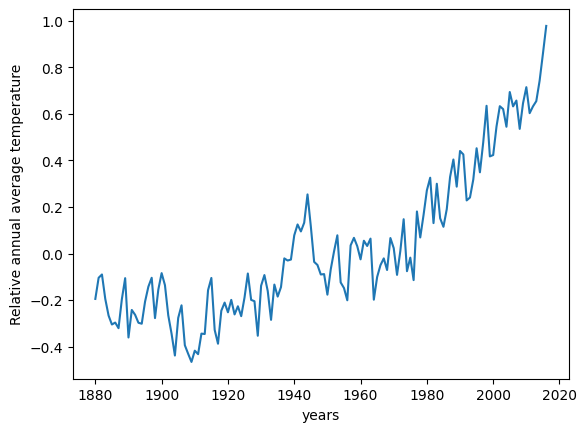

In [43]:
plot(t['Year'].values, t['av'].values)
plt.xlabel('years')
d=plt.ylabel('Relative annual average temperature')

In [49]:
# We save it now, so we can use it later
t.to_csv('data/T_adat_clean.csv', index=False)

### Let's take a look at the other file

In [44]:
!head -n 20 data/co2_adat.txt

# --------------------------------------------------------------------
# USE OF NOAA ESRL DATA
# 
# These data are made freely available to the public and the
# scientific community in the belief that their wide dissemination
# will lead to greater understanding and new scientific insights.
# The availability of these data does not constitute publication
# of the data.  NOAA relies on the ethics and integrity of the user to
# insure that ESRL receives fair credit for their work.  If the data 
# are obtained for potential use in a publication or presentation, 
# ESRL should be informed at the outset of the nature of this work.  
# If the ESRL data are essential to the work, or if an important 
# result or conclusion depends on the ESRL data, co-authorship
# may be appropriate.  This should be discussed at an early stage in
# the work.  Manuscripts using the ESRL data should be sent to ESRL
# for review before they are submitted for publication so we can
# insure that the quality and lim

In [45]:
# there are lot of comments let's see the last rows, let's skip those with a bash script 
# (or we could look into the file as well)
!grep -v "#" data/co2_adat.txt | head

1958   3    1958.208      315.71      315.71      314.62     -1
1958   4    1958.292      317.45      317.45      315.29     -1
1958   5    1958.375      317.50      317.50      314.71     -1
1958   6    1958.458      -99.99      317.10      314.85     -1
1958   7    1958.542      315.86      315.86      314.98     -1
1958   8    1958.625      314.93      314.93      315.94     -1
1958   9    1958.708      313.20      313.20      315.91     -1
1958  10    1958.792      -99.99      312.66      315.61     -1
1958  11    1958.875      313.33      313.33      315.31     -1
1958  12    1958.958      314.67      314.67      315.61     -1
grep: write error: Broken pipe


In [46]:
# So there is no header and w need to name the columns
n=['y','mo','dec y','co2','interpolated','trend','#d']

# The separator are varying number of spaces, so instead of 'sep', we use the 'delim_whitespace' argument
co2 = pd.read_csv("data/co2_adat.txt", delim_whitespace=True, comment='#', names=n)
co2.head()

,y,mo,dec y,co2,interpolated,trend,#d
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


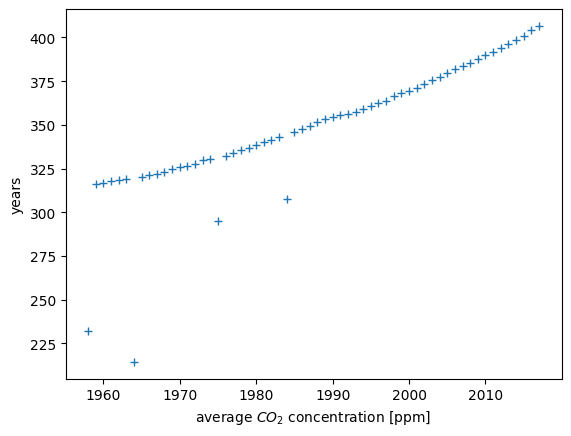

In [48]:
# Plotting with the matplotlib plugin for pandas
avgco2 = co2.groupby('y')['co2'].mean()
plot_co2 = avgco2.plot(marker='+', linestyle=' ', xlabel=r'average $CO_2$ concentration [ppm]', ylabel='years')

## Pandas-Correlation

Compare two Dataframes! (from previous exercise `data/T_adat.csv` and `data/co2_adat.txt`)

- Merge the two Dataframes along the column that contains the years, and leave only those rows that contain value in both Dataframes.

- Take a look at the newly created Dataframe and, check how much the average temperature correlates with the average $CO_2$ concentration. Plot the average temperatures as the function of $CO_2$ concentration.

### Solution

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [50]:
# Read again the datasets, but now the cleaned version
t = pd.read_csv('data/T_adat_clean.csv')

n=['y','mo','dec y','co2','interpolated','trend','#d']
co2=pd.read_csv('data/co2_adat.txt',delim_whitespace=True,comment='#',names=n)

In [51]:
# we need to get the co2 averages with groupby into z new Dataframe
co2_simple = pd.DataFrame()
co2_simple['y'] = list(co2['y'].unique())
co2_simple['avgco2'] = list(co2.groupby('y')['co2'].mean())

In [52]:
co2_simple.head()

,y,avgco2
0,1958,232.267000
1,1959,315.974167
2,1960,316.907500
3,1961,317.637500
4,1962,318.450833


In [53]:
# Nerge the two dataframes
new_df = t.merge(co2_simple, how='inner',
                left_on='Year',
                 right_on='y')
new_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec,J-D,D-N,DJF,MAM,JJA,SON,av,y,avgco2
0,1958,0.39,0.24,0.10,.01,.08,-.05,.06,-.06,-.03,...,.01,.07,.08,.27,.06,-.02,.01,0.067500,1958,232.267000
1,1959,0.06,0.10,0.19,.17,.06,.02,.06,-.01,-.06,...,-.03,.03,.04,.06,.14,.02,-.08,0.031667,1959,315.974167
2,1960,-0.01,0.14,-0.36,-.16,-.08,.01,-.02,.00,.05,...,.18,-.03,-.04,.03,-.20,.00,.00,-0.025000,1960,316.907500
3,1961,0.07,0.18,0.09,.15,.13,.12,-.03,.02,.05,...,-.15,.05,.08,.14,.12,.04,.03,0.055000,1961,317.637500
4,1962,0.08,0.14,0.12,.05,-.06,.06,-.02,-.02,.00,...,-.01,.03,.02,.03,.04,.01,.01,0.032500,1962,318.450833


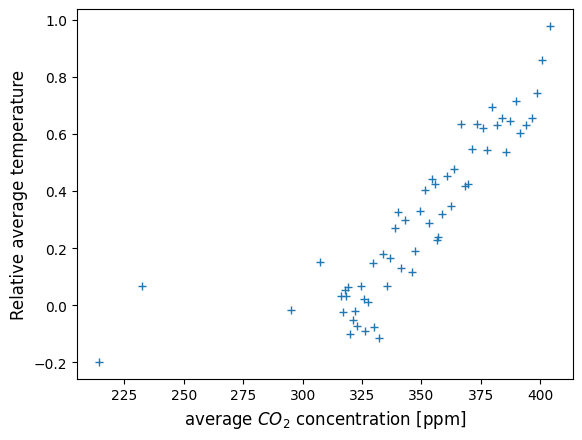

In [54]:
plot(new_df['avgco2'].values, new_df['av'].values, '+')
plt.xlabel(r'average $CO_2$ concentration [ppm]', fontsize=12)
d = plt.ylabel('Relative average temperature', fontsize=12)

In [55]:
print(r'Pearson-correlation coefficient between the annual average $CO_2$ concentration and the average temperature: ' 
      + str(new_df['avgco2'].corr(new_df['av'])))

Pearson-correlation coefficient between the annual average $CO_2$ concentration and the average temperature: 0.8436089883938621


## Still fossil fuel
The `fossil-fuel-co2-emissions-by-nation.csv` file contains the $CO_2$ emissions by burning fossil fuel of each country in the world in the last two centuries.

- With the help of the `pandas` module load the data into `DataFrames`!
- Calculate the total emission in 2014! Using the "Total" column, which were the top ten countries emitting $CO_2$?.
- Create a plot with the total emission of the 10 top polluters as the function of time  (column "Year")! 
- Create a plot with the emission of the Visegrad 4 countries (Hungary, Slovakia, Czech Republic, Poland), where you separate the "Solid Fuel", "Liquid Fuel" and "Gas Fuel" columns. 


### Solution

In [18]:
%pylab inline
import pandas as pd
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


In [19]:
dat=pd.read_csv('data/fossil-fuel-co2-emissions-by-nation.csv')

In [20]:
dat.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


In [21]:
# In order to get the first 10 countries that produce the most co_2 in 2014 we need to
# select data for 2014
# keep only the Country nd Total columns
# sort by Total
# and list the first 10
ten_polluters = dat[dat['Year'] == 2014][['Country','Total']].sort_values(by = 'Total', ascending = False)[:10]

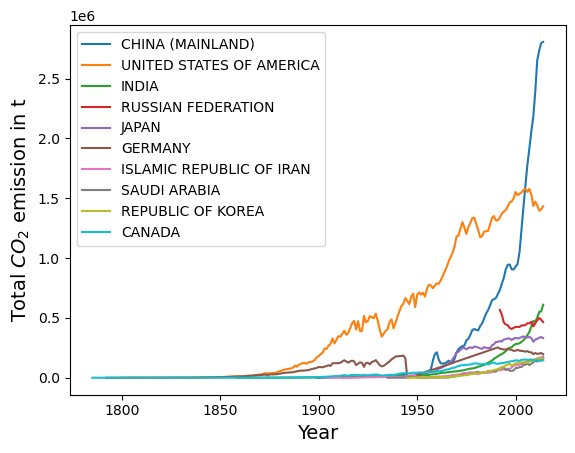

In [22]:
# Create a plot for each country
for c in ten_polluters['Country']:
    plot(dat[dat['Country']==c]['Year'],
         dat[dat['Country']==c]['Total'], label=c)    
    
legend()
xlabel('Year', fontsize=14)
ylabel('Total $CO_2$ emission in t', fontsize=14);

Have some interactivity with ipywidgets

We will use plotly later, which is a more suitable package for interactive figures and applications

In [24]:
countries = dat['Country'].unique()

In [25]:
@interact(country=countries)
def plot_total_country(country):
    plot(dat[dat['Country']==country]['Year'],
         dat[dat['Country']==country]['Total'], label=country)  
    title(f'$CO_2$ emission of {country}')
    xlabel('Year', fontsize=14)
    ylabel('Total $CO_2$ emission in t', fontsize=14);
    

interactive(children=(Dropdown(description='country', options=('UNITED KINGDOM', 'CANADA', 'GERMANY', 'POLAND'…

Compare any two countries

In [26]:
@interact(country1=countries, country2=countries)
def plot_total_country(country1, country2):
    plot(dat[dat['Country']==country1]['Year'],
         dat[dat['Country']==country1]['Total'], label=country1)  
    plot(dat[dat['Country']==country2]['Year'],
         dat[dat['Country']==country2]['Total'], label=country2)
    title(f'Compare $CO_2$ emission of {country1} and {country2}')
    xlabel('Year', fontsize=14)
    ylabel('Total $CO_2$ emission in t', fontsize=14);

interactive(children=(Dropdown(description='country1', options=('UNITED KINGDOM', 'CANADA', 'GERMANY', 'POLAND…